# Predicting Angiographic Disease Status

# Introduction
With the advent of globalisation, we have seen an exponential improvement in the quality of life for people globally. Inventions from plastics and the internet have revolutionised the way human society functions. With globalisation, we saw both industrialisation and innovations in food technology. But, like everything, this has positively and negatively impacted human life. 

In our modern times, we have witnessed exorbitant increases in the prevalence rates of diseases fueled by unhealthy lifestyles, which have long-lasting effects on people's lives.

Angiographic disease refers to a condition which is associated with blood vessels and blood flow through these vessels. With this project, we are analysing the *processed.cleveland.data* file and using the data to predict the type of chest pain an individual has in the event the individual is sick.

Chest pains are classified into the four following types:
1. Typical angina
2. Atypical angina
3. Non-anginal pain
4. Asymptomatic

# Methods & Results

The first step of all is to load the libraries.

In [1]:
# Importing Necessary Libraries
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

After we loaded the libraries, we used read_csv to load the data from an URL of the provided website. Then we made a preliminary observation of the data using the glimpse function to evaluate what changes are needed.

In [2]:
# Loading Data
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_disease_data <- read_csv(url, 
                               col_names = FALSE)

# Covering Data Frame To Tibble
heart_disease_data <- as_tibble(heart_disease_data)

# Checking Data Frame
glimpse(heart_disease_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 303
Columns: 14
$ X1  <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44, 52, 57, 48…
$ X2  <dbl> 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, …
$ X3  <dbl> 1, 4, 4, 3, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 3, 3, 2, 4, 3, 2, 1, 1, …
$ X4  <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, 140, 130, 1…
$ X5  <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 256, 2…
$ X6  <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, …
$ X7  <dbl> 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, …
$ X8  <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 153, 142, 1…
$ X9  <dbl> 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, …
$ X10 <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4, 1.3, 0.6, 0…
$ X11 <dbl> 3, 2, 2, 3, 1, 1, 3, 1, 2, 3, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 2, 1, …
$ X12 <chr> "0.0", "3.0", "2.0", "0.0", "0.0", "0.0", "2.0", "0.0", "1.0", "0.…
$ X13 <chr> "6.0",

Now we can see that this data is really untidy because there are factor values being named "dbl" and "chr", and the first step to tackel this is by converting them using "as.factor".
We also noticed that the column names are hard to read since they are X1, X2, X3..., and we should rename them with the name given by the website.

After that, lets have a look at the data using the glimpse function, we use glimpse because the data have lots of column names and would be eaiser to read sideways.

In [3]:
# Preprocessing Of Data
heart_disease_data_factored <- heart_disease_data |>
                        mutate(X2  = as.factor(X2) ,
                               X3  = as.factor(X3) ,
                               X6  = as.factor(X6) ,
                               X7  = as.factor(X7) ,
                               X9  = as.factor(X9) ,
                               X11 = as.factor(X11),
                               X12 = as.factor(X12),
                               X13 = as.factor(X13),
                               X14 = as.factor(X14))

heart_disease_data_renamed <- rename(heart_disease_data_factored,
                                     age = X1, 
                                     sex = X2, 
                                     cp = X3,
                                     trestbps = X4, 
                                     chol = X5, 
                                     fbs = X6,
                                     restecg = X7,
                                     thalach = X8,
                                     exang = X9,
                                     oldpeak = X10,
                                     slope = X11,
                                     ca = X12,
                                     thal = X13,
                                     num = X14)
#cleaning data
glimpse(heart_disease_data_renamed)

Rows: 303
Columns: 14
$ age      <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44, 52, 5…
$ sex      <fct> 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1…
$ cp       <fct> 1, 4, 4, 3, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 3, 3, 2, 4, 3, 2, 1…
$ trestbps <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, 140, 1…
$ chol     <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 2…
$ fbs      <fct> 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0…
$ restecg  <fct> 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2…
$ thalach  <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 153, 1…
$ exang    <fct> 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1…
$ oldpeak  <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4, 1.3, 0…
$ slope    <fct> 3, 2, 2, 3, 1, 1, 3, 1, 2, 3, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 2…
$ ca       <fct> 0.0, 3.0, 2.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1…
$ thal     <fct> 6

Because we are predicting chest pains, let's have a look at the proportion of each type in the data. This will tell us if it's imbalanced.

In [4]:
#Showing row count for each chest pain type
num_obs <- nrow(heart_disease_data_renamed)
total_proportion <- heart_disease_data_renamed |>
                    slice(1:302) |>
                    group_by(cp) |>
                    summarize(
                        count = n(),
                        percentage = n() / num_obs * 100)
total_proportion

cp,count,percentage
<fct>,<int>,<dbl>
1,23,7.590759
2,50,16.501650
3,85,28.052805
4,144,47.524752


[Figure 1]

As the data distribution is uneven  in this training set (class imbalance), the model will prefer 4 and the prediction will be inaccurate. Therefore, we will cut the data to ensure even distrubution in our training set. We can see from the table above that chest pain 1 have only 23 observations while 2,3,and 4 have way more than 23. So we randomly choose 20-30 observations from chest pain 2, 3, and 4 and only use these for the total data.

In [5]:
#Getting a random number of rows (between 20-30) with cp 4
set.seed(45768)

random_number <- sample(20:30, 1, replace=TRUE)

even_4 <- heart_disease_data_renamed |>
          filter(cp == 4) |>
          group_by(cp) |>
          slice(1:random_number)

In [6]:
#Getting a random number of rows (between 20-30) with cp 3
set.seed(457681)

random_number <- sample(20:30, 1, replace=TRUE)

even_3 <- heart_disease_data_renamed |>
          filter(cp == 3) |>
          group_by(cp) |>
          slice(1:random_number)

In [7]:
#Getting a random number of rows (between 20-30) with cp 2
set.seed(457682)

random_number <- sample(20:30, 1, replace=TRUE)

even_2 <- heart_disease_data_renamed |>
          filter(cp == 2) |>
          group_by(cp) |>
          slice(1:random_number)

In [8]:
#Getting a random number of rows (between 20-30) with cp 1 and combining the other even data sets.
even_data <- heart_disease_data_renamed|>
             filter(cp == 1) |>
             rbind(even_4, even_2, even_3)

In [9]:
#row distribution for even data
num_obs <- nrow(even_data)
even_proportion <- even_data |>
                   group_by(cp) |>
                   summarize(
                     count = n(),
                     percentage = n() / num_obs * 100)

Now the distribution is clearly even with all types of chest pain having 20-30 counts, and each taking about 25%.

After making sure that the data is ready, we split the data into training and testing. This is because if we training and test the data, our accuracy would be 100%, giving a useless result.

In [10]:
#Splitting
set.seed(45768)

heart_disease_data_split <- initial_split(even_data,prop=.75,strata=cp)

training_data <- training(heart_disease_data_split)

testing_data <- testing(heart_disease_data_split)

num_obs <- nrow(training_data)

training_data_proportion <- training_data |>
                            group_by(cp) |>
                            summarize(
                              count = n(),
                              percentage = n() / num_obs * 100)

#this tables shows the number of observation in each class
training_data_proportion

cp,count,percentage
<fct>,<int>,<dbl>
1,17,22.66667
2,22,29.33333
3,21,28.00000
4,15,20.00000


[Figure 1.1]

After spliting our data, we have to select predictors and make a visualization on them.

We selected all the double typed predictors because they will help on calculating straight line distances (the argorithm we use for classification). We also discard the factors because it doesn't work well in this model, and therefore we won't interperate them.

As for the visualization, we are trying to interpret the distrubution of each predictor to our label to evaluate their correlation. In other words, how related they are to (chest pain type). To do this, we calculated each mean value of the four types of chest pain for the different predictors and create a bar graph as visualization.

[1] "Figure 1.2"


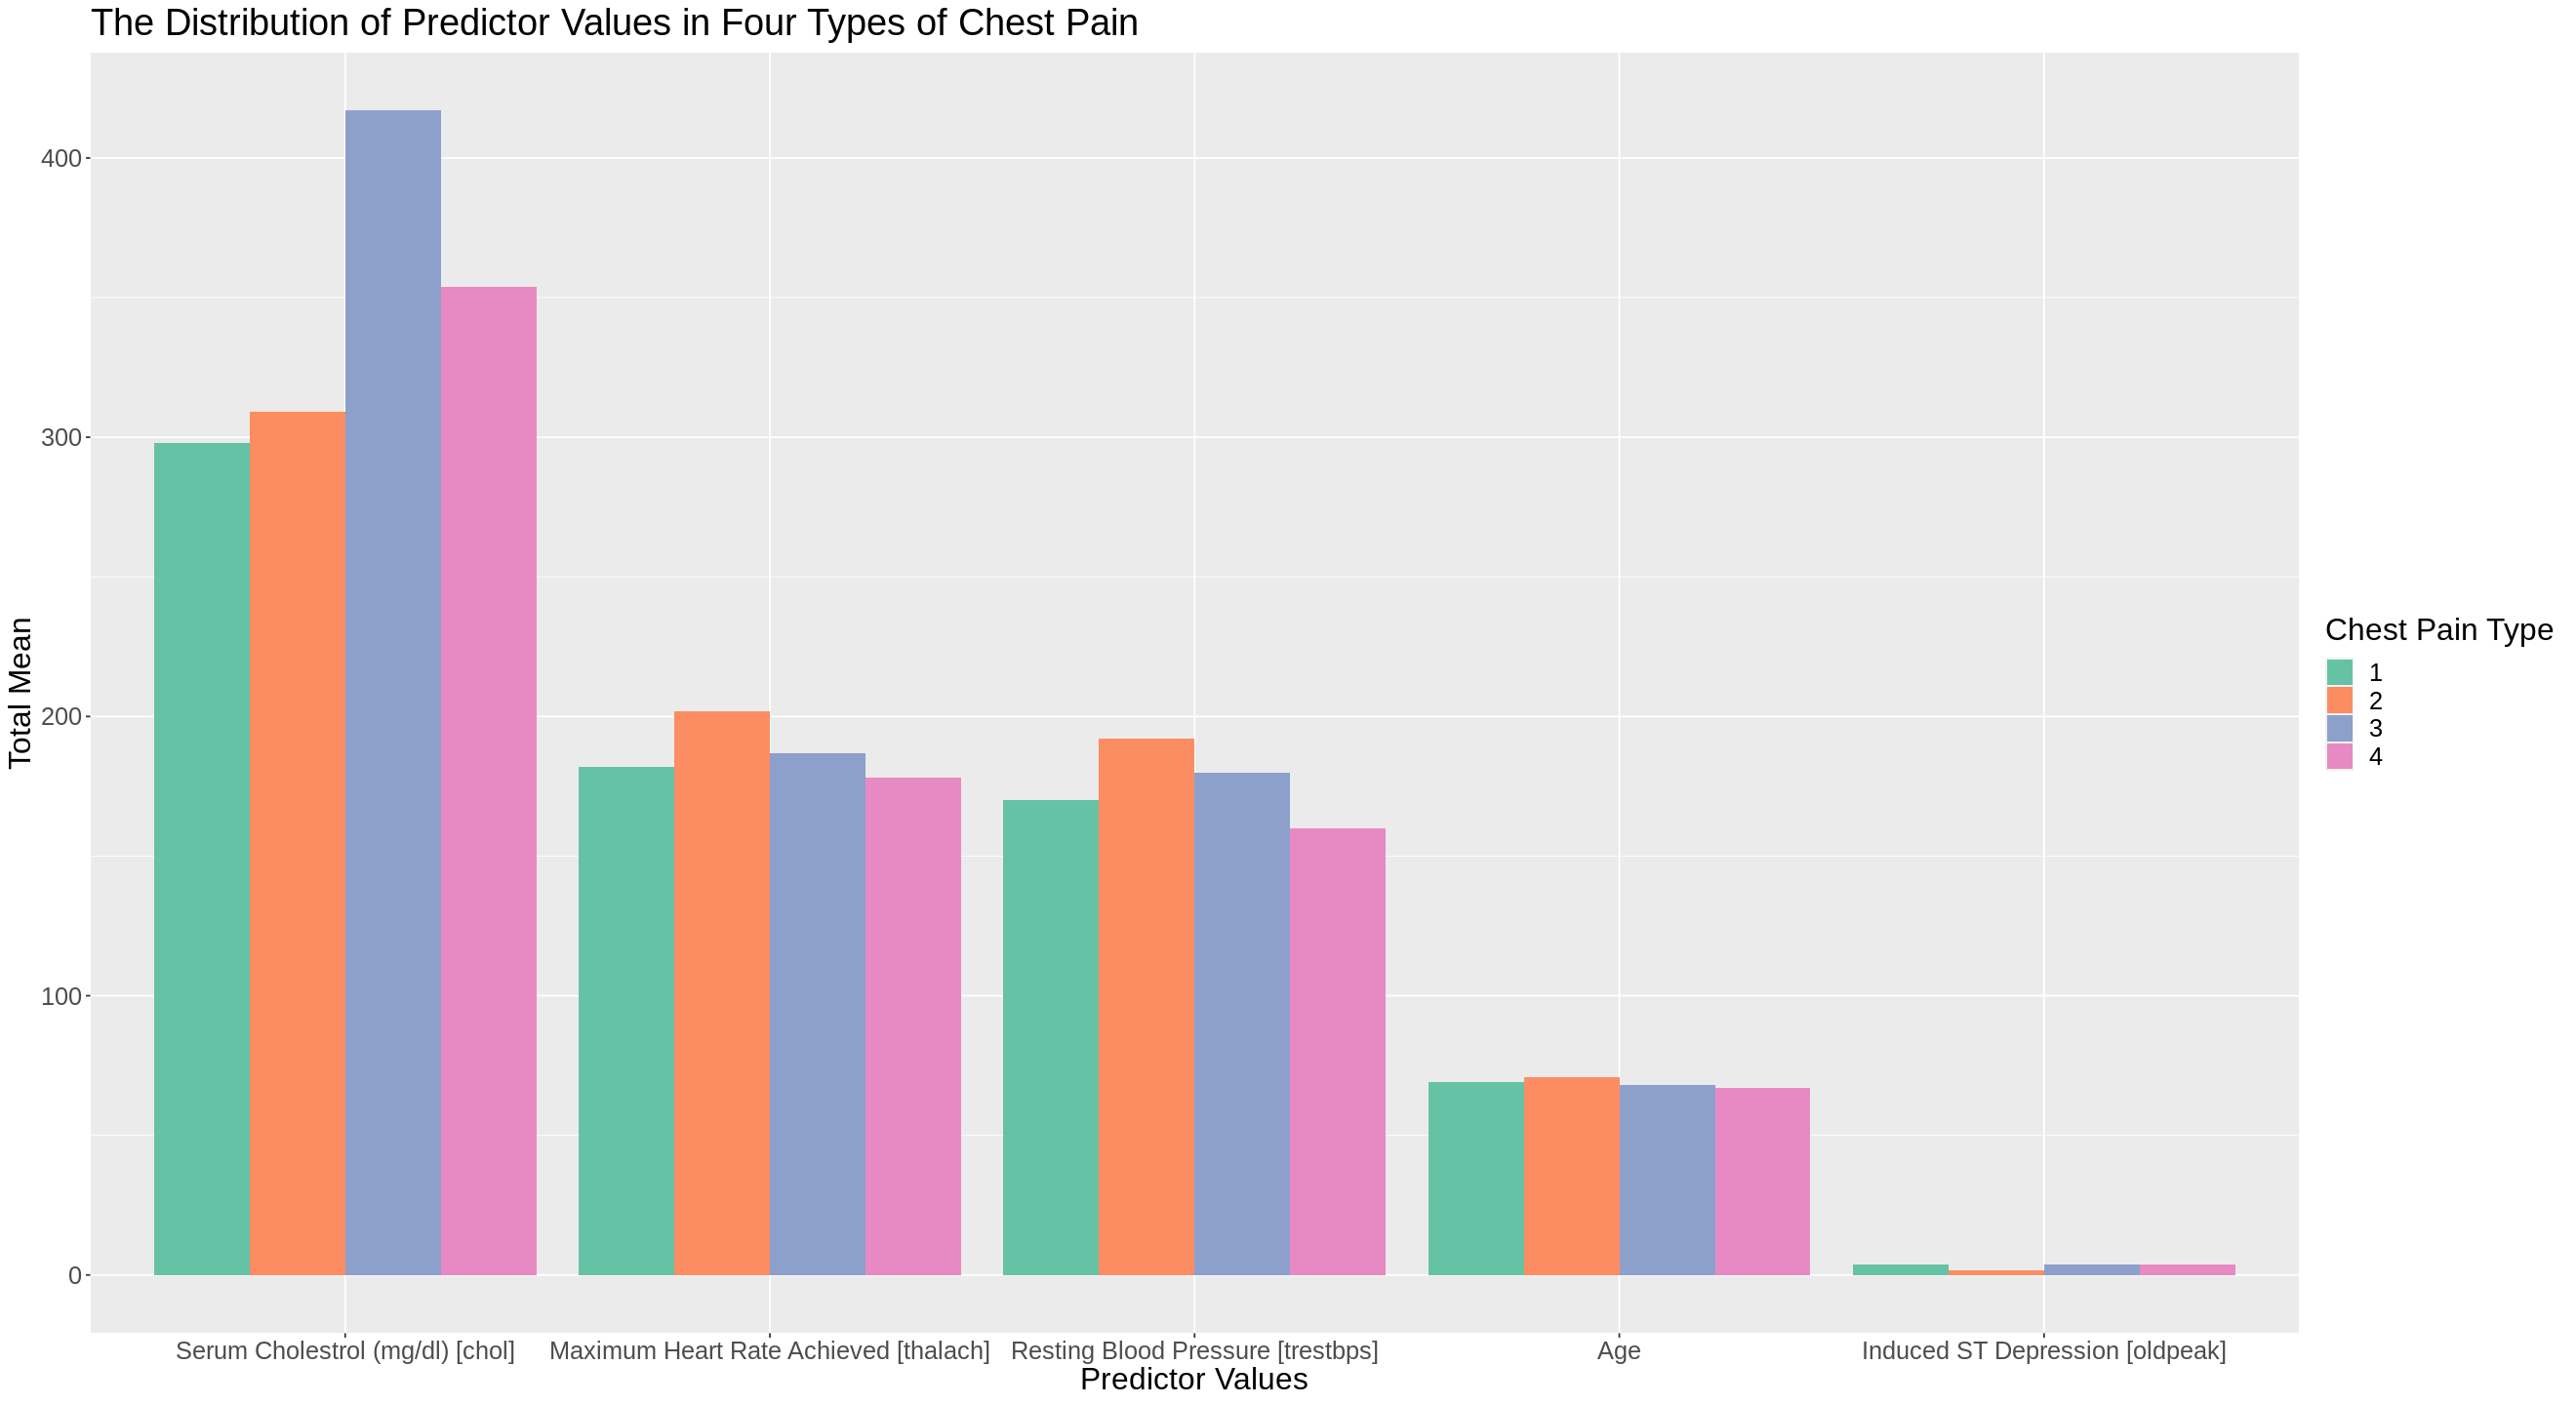

In [11]:
#Mean of observations with type double (training data)
training_data_type_double <- select(training_data, -sex , -fbs , -restecg , -exang , -slope , -ca , -thal , -num)   

training_data_type_double<-rename(training_data_type_double,
                    "Serum Cholestrol (mg/dl) [chol]"=chol,
                    "Maximum Heart Rate Achieved [thalach]"=thalach,
                    "Resting Blood Pressure [trestbps]"=trestbps,
                    "Induced ST Depression [oldpeak]"=oldpeak,
                    "Age"=age)

mean_data <- training_data_type_double |>
             group_by(cp) |>
             summarize(across("Age":"Induced ST Depression [oldpeak]", max))

mean_data <- mean_data |>
            pivot_longer(
                  cols="Age":"Induced ST Depression [oldpeak]",
                  names_to = "predictor",
                  values_to = "mean_value")

options(repr.plot.width = 22, repr.plot.height = 12)

data_final_plot <- mean_data|>
                    ggplot(aes(x = fct_reorder(predictor, mean_value, .desc = TRUE), y = mean_value, fill = cp))+
                    geom_bar(stat = "identity", position = "dodge")+
                    scale_fill_brewer(palette = "Set2") +
                    labs(x = "Predictor Values", y = "Total Mean", fill = "Chest Pain Type")  +
                    ggtitle("The Distribution of Predictor Values in Four Types of Chest Pain") +
                    theme(text = element_text(size = 19))

data_final_plot
print("Figure 1.2")

[Figure 1.2]

# Classification Model

In [12]:
# Creating the classification model
set.seed(45768)

heart_recipe <- recipe(cp ~ age + trestbps + chol + thalach + oldpeak , data = training_data) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
             set_engine("kknn") |>
             set_mode("classification")

# Using V_fold to evaluate accuracy and evaluate optimal k

heart_vfold <- vfold_cv(training_data, v = 5, strata = cp)

knn_results <- workflow() |>
               add_recipe(heart_recipe) |>
               add_model(knn_tune) |>
               tune_grid(resamples = heart_vfold, grid = 10) |>
               collect_metrics()

[1] 5

[1] "Figure 3"


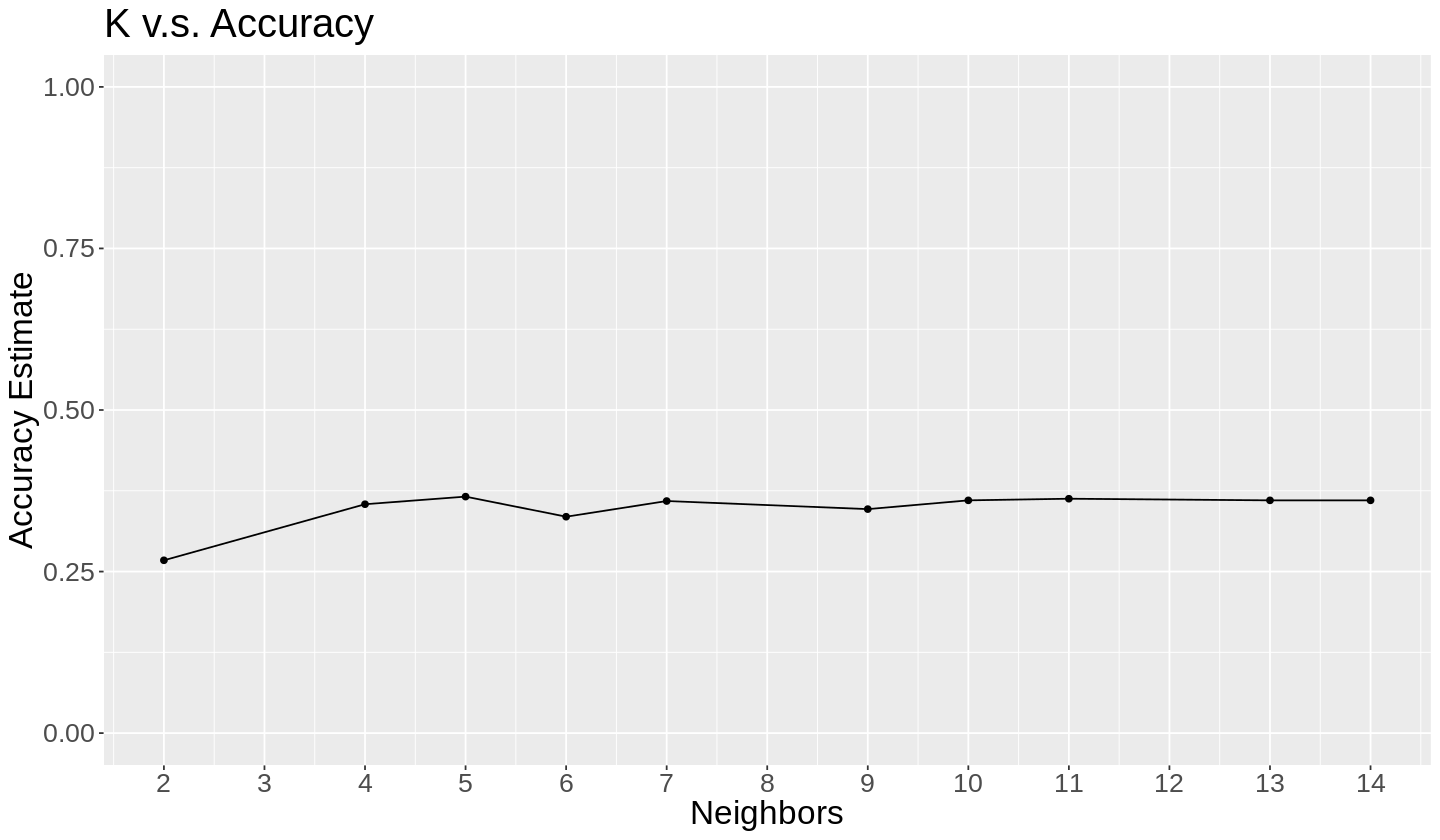

In [13]:
#Visualizing K accuracy
accuracies <-  knn_results |> 
               filter(.metric == "accuracy")

options(repr.plot.width = 12, repr.plot.height = 7)

accuracy_versus_k <-   ggplot(accuracies, aes(x = neighbors, y = mean))+
                       geom_point() +
                       geom_line() +
                       labs(x = "Neighbors", y = "Accuracy Estimate") +
                       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
                       scale_y_continuous(limits = c(0, 1.0)) + # adjusting the y-axis
                       ggtitle("K v.s. Accuracy") +
                       theme(text = element_text(size = 20))
            
accuracy_versus_k

k_optimal <- accuracies |>
             arrange(desc(mean)) |>
             select(neighbors) |>
             slice(1) |>
             pull()

k_optimal
print("Figure 3")

[Figure 3]

In [14]:
#Using the evluated k to predict testing set
knn_fit <- nearest_neighbor(weight_func = "rectangular", neighbors = k_optimal) |>
           set_engine("kknn") |>
           set_mode("classification")

k_workflow <- workflow() |>
              add_recipe(heart_recipe) |>
              add_model(knn_fit) |>
              fit(data = testing_data) 

predicted <- predict(k_workflow, testing_data) |>
             bind_cols(testing_data)

#Computing accuracy
results <-  predicted |>
            metrics(truth = cp, estimate = .pred_class) |>
            filter(.metric == "accuracy") |>
            select(.estimate) |>
            pull()

print("Final Accuracy:")
print(results)

[1] "Final Accuracy:"
[1] 0.5925926


# Discussion

## Expected Outcomes

We expected to find strong correlations between our predictors and the chest pain an individual is likely to experience; This was because cardiovascular diseases often come about due to certain factors and always have accompanying characteristics.

## Summary And Explanations

The classification model above has about a $60\%$ chance of predicting the correct type of chest pain a person may be experiencing. We came up with two possible explanations for this low accuracy. First, to test the individual correlation between predictors and type of chest pain, the classification model was tested individually with each predictor variable and still yielded similar accuracies. We have considered several possibilities to explain these low accuracies:
1. A possible explanation for the low accuracy considers the possibility of needing more data for the model to make predictions; This may be the case as our training data only contains about 80 observations.
2. We think there may be a possibility that the kind of chest pain an individual is likely to experience is challenging to determine, irrespective of the methods applied and can depend on the genetic composition of the individual as it defines the physiology of the person and that can influence kind of pain they experience. 
3. A third possibility we have considered is that pain is a subjective psychological experience, and different people have different perceptions of similar painful stimuli; therefore, the pain they experience is likely to differ.

## Impacts
Improved model accuracy can help quickly detect the type of chest pain and help administer proper treatment to the patient in time, preventing unnecessary harm to their wellbeing. The model can also be used to study how the type of chest pain varies with different factors and can assist doctors and scientists in getting more information about the same type. Additionally, a better understanding of the strongly correlated factors influencing chest pain would lead to a quicker and more accurate diagnosis.

## Possible Question
1. Are there any associations between chest pain type and genotypic factors?
2. Are there any associations between an individual's psychological temperaments and the chest pain they experience?

# References

https://pubmed.ncbi.nlm.nih.gov/20494662/
This is a Study from the National Library of Medicine which seeks to evaluate how effective typical anginal pain and atypical/nonanginal pain (cp type 1,2 and 3 respectively) are at predicting myocardial ischemia, a CVID where heart blood to the flow is reduced.

https://www.who.int/health-topics/cardiovascular-diseases/#tab=tab_1
This is a general overview of Cardivascular disease by the World Health Organization, talking about its symptoms, treatments and general information such as it's estimated yearly mortality rate of 17.9 million.

# Glossary

X1.(age)

X2.(sex)\
(1 = male; 0 = female)

X3.(cp)\
(chest pain type)
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

X4.(trestbps)\
resting blood pressure (in mm Hg on admission to the hospital)

X5.(chol)\
serum cholestoral in mg/dl

X6.(fbs)\
(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

X7.(restecg)\
 resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

X8.(thalach)\
maximum heart rate achieved

X9.(exang)\
exercise induced angina (1 = yes; 0 = no)

X10.(oldpeak)\
ST depression induced by exercise relative to rest

X11.(slope)\
the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

X12.(ca)\
number of major vessels (0-3) colored by flourosopy

X13.(thal)\
3 = normal; 6 = fixed defect; 7 = reversable defect

X14.(num) (the predicted attribute)\
diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)